# US Home Price casestudy

This Notebook contains a casestudy on US Home Prices and key factors that influence home prices.


we will be collecting publicly available data, clean the data, build a final dataset, perform EDA & Data Visualization and finally build a data science model

## 1. Data Collection


* We will not be using ready made datasets from kaggle, but I have chosen FRED (Federal Reserve Economic Data) as a reliable public data source.
* We will be using some key factors like GDP, Mortgage, Unemployment rate, Population growth etc to carry out case study and model building
  

In [1]:
# installing fred api : 
# !pip install fredapi

In [112]:
import os
import pandas as pd
from fredapi import Fred
from dotenv import load_dotenv

load_dotenv()
FRED_API_KEY = os.getenv("FRED_API_KEY")

fred = Fred(api_key=FRED_API_KEY)

data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

series_list = [
    "CPIAUCSL",  # Consumer Price Index for All Urban Consumers: Seasonally Adjusted (CPI-U)
    "CSUSHPISA",  # S&P Case-Shiller US National Home Price Index
    "FEDFUNDS",  # Effective Federal Funds Rate
    "GDB",  # Gross Domestic Product
    "HOUST",  # Housing Starts
    "MCOILWTICO",  # Crude Oil Prices (West Texas)
    "MEHOINUSA672N",  # Median Household Income
    "POP",  # Population in the US
    "UNRATE"  # Unemployment Rate
]

# I have included more explanation about above features in descriptions.txt

for series in series_list:
    data = fred.get_series(series)
    df = data.reset_index()
    df.columns = ["date", "value"]  
    df.to_csv(os.path.join(data_dir,"f{series}.csv"), index=False)
    print(f"Saved {series} to {data_dir}/{series}.csv")
    print(df.head())  

Saved CPIAUCSL to data/CPIAUCSL.csv
        date  value
0 1947-01-01  21.48
1 1947-02-01  21.62
2 1947-03-01  22.00
3 1947-04-01  22.00
4 1947-05-01  21.95
Saved CSUSHPISA to data/CSUSHPISA.csv
        date  value
0 1975-01-01    NaN
1 1975-02-01    NaN
2 1975-03-01    NaN
3 1975-04-01    NaN
4 1975-05-01    NaN
Saved FEDFUNDS to data/FEDFUNDS.csv
        date  value
0 1954-07-01   0.80
1 1954-08-01   1.22
2 1954-09-01   1.07
3 1954-10-01   0.85
4 1954-11-01   0.83
Saved GDB to data/GDB.csv
        date    value
0 1946-01-01      NaN
1 1946-04-01      NaN
2 1946-07-01      NaN
3 1946-10-01      NaN
4 1947-01-01  232.289
Saved HOUST to data/HOUST.csv
        date   value
0 1959-01-01  1657.0
1 1959-02-01  1667.0
2 1959-03-01  1620.0
3 1959-04-01  1590.0
4 1959-05-01  1498.0
Saved MCOILWTICO to data/MCOILWTICO.csv
        date  value
0 1986-01-01  22.93
1 1986-02-01  15.46
2 1986-03-01  12.61
3 1986-04-01  12.84
4 1986-05-01  15.38
Saved MEHOINUSA672N to data/MEHOINUSA672N.csv
        da

Now we have data of required key factors. I have thought of other more key factors like crime rate, etc. but to reduce the complexity of understanding and to keep it simple, we will be continuing with these factors only.


We have total of 10 key features and 1 target feature (CSUSHPISA as the proxy for home price indication) 

## 2. Data Cleaning

In this section, we will be finalizing on how many years of data should we use to build the final dataset. and if there are any null values in the dataset, we will fill them or remove them.

In [79]:
import numpy as np
import pandas as pd
import os

cwd = os.getcwd()

data_dir = os.path.join(cwd, "data")

cpi = pd.read_csv(os.path.join(data_dir, "CPIAUCSL.csv"))
csus = pd.read_csv(os.path.join(data_dir, "CSUSHPISA.csv"))
fedfunds = pd.read_csv(os.path.join(data_dir, "FEDFUNDS.csv"))
gdp = pd.read_csv(os.path.join(data_dir, "GDB.csv"))
houst = pd.read_csv(os.path.join(data_dir, "HOUST.csv"))
mcoil = pd.read_csv(os.path.join(data_dir, "MCOILWTICO.csv"))
meho = pd.read_csv(os.path.join(data_dir, "MEHOINUSA672N.csv"))
# mort15 = pd.read_csv(os.path.join(data_dir, "MORTGAGE15US.csv"))
# mort30 = pd.read_csv(os.path.join(data_dir, "MORTGAGE30US.csv"))
pop = pd.read_csv(os.path.join(data_dir, "POP.csv"))
unrate = pd.read_csv(os.path.join(data_dir, "UNRATE.csv"))
permit = pd.read_csv(os.path.join(data_dir, "PERMIT.csv"))


print(cpi.head())
print(csus.head())
print(fedfunds.head())
print(gdp.head())
print(houst.head())
print(mcoil.head())
print(meho.head())
# print(mort15.head())
# print(mort30.head())
print(pop.head())
print(unrate.head())
print(permit.head())

         date  value
0  1947-01-01  21.48
1  1947-02-01  21.62
2  1947-03-01  22.00
3  1947-04-01  22.00
4  1947-05-01  21.95
         date  value
0  1975-01-01    NaN
1  1975-02-01    NaN
2  1975-03-01    NaN
3  1975-04-01    NaN
4  1975-05-01    NaN
         date  value
0  1954-07-01   0.80
1  1954-08-01   1.22
2  1954-09-01   1.07
3  1954-10-01   0.85
4  1954-11-01   0.83
         date    value
0  1946-01-01      NaN
1  1946-04-01      NaN
2  1946-07-01      NaN
3  1946-10-01      NaN
4  1947-01-01  232.289
         date   value
0  1959-01-01  1657.0
1  1959-02-01  1667.0
2  1959-03-01  1620.0
3  1959-04-01  1590.0
4  1959-05-01  1498.0
         date  value
0  1986-01-01  22.93
1  1986-02-01  15.46
2  1986-03-01  12.61
3  1986-04-01  12.84
4  1986-05-01  15.38
         date    value
0  1984-01-01  56780.0
1  1985-01-01  57860.0
2  1986-01-01  60010.0
3  1987-01-01  60760.0
4  1988-01-01  61210.0
         date     value
0  1952-01-01  156309.0
1  1952-02-01  156527.0
2  1952-03-01  1

<Axes: >

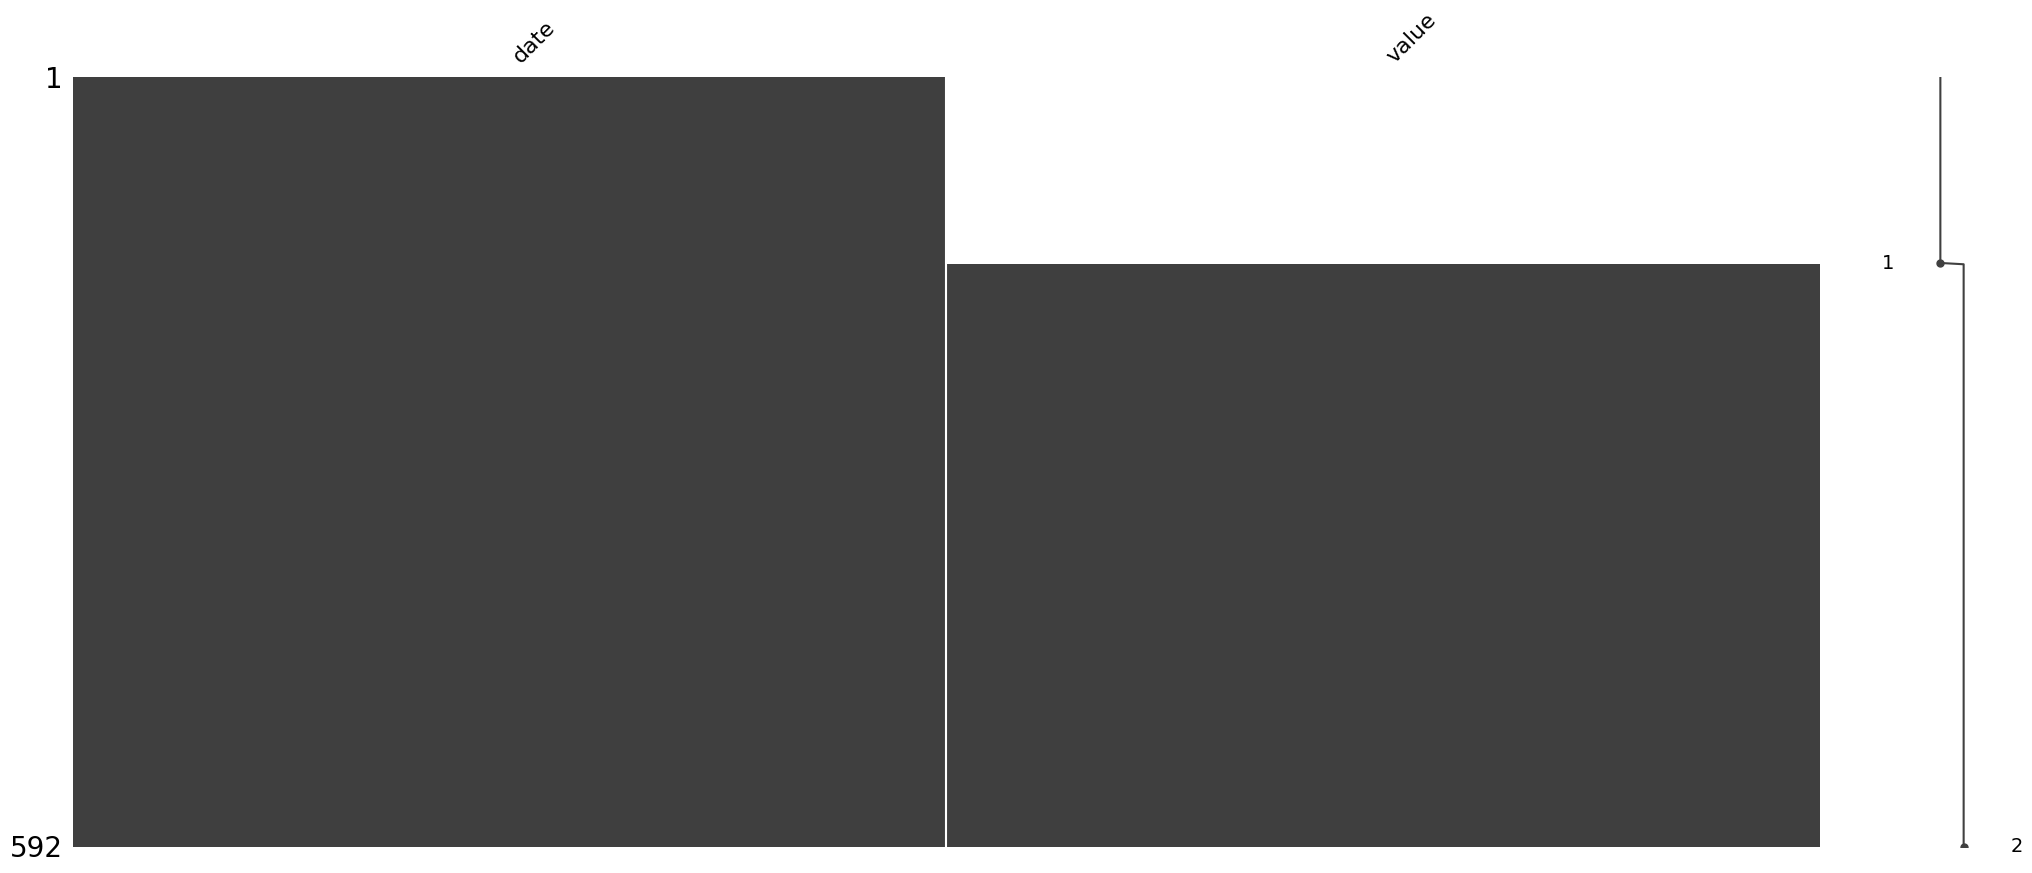

In [80]:
import missingno as mno

mno.matrix(csus)

We can see that in CSUSHPISA Data, we have some values missing. as this is our target feature, we will only continue with a range of available values.

In [81]:
missing_years = csus[csus["value"].isna()]["date"]
missing_years = pd.to_datetime(missing_years).dt.year
print("Missing years:", missing_years.unique())

Missing years: [1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986]


We are missing data from 1975 to 1986, still we have data from 1987 to 2024, which is good enough, i.e, almost 37 years

In [82]:
csus.dropna()
csus.reset_index(drop=True, inplace=True)
csus

,date,value
0,1975-01-01,NaN
1,1975-02-01,NaN
2,1975-03-01,NaN
3,1975-04-01,NaN
4,1975-05-01,NaN
...,...,...
587,2023-12-01,314.443
588,2024-01-01,315.728
589,2024-02-01,317.257
590,2024-03-01,318.217


In [83]:
csus.isnull().sum()

date       0
value    144
dtype: int64

We are now left with 448 instances of data


Now we will update all other dataframes to be in this date range only.

In [84]:
cpi = cpi[(cpi["date"] >= "1987-01-01") & (cpi["date"] <= "2024-03-01")]
csus = csus[(csus["date"] >= "1987-01-01") & (csus["date"] <= "2024-03-01")]
fedfunds = fedfunds[(fedfunds["date"] >= "1987-01-01") & (fedfunds["date"] <= "2024-03-01")]
gdp = gdp[(gdp["date"] >= "1987-01-01") & (gdp["date"] <= "2024-03-01")]
houst = houst[(houst["date"] >= "1987-01-01") & (houst["date"] <= "2024-03-01")]
mcoil = mcoil[(mcoil["date"] >= "1987-01-01") & (mcoil["date"] <= "2024-03-01")]
meho = meho[(meho["date"] >= "1987-01-01") & (meho["date"] <= "2024-03-01")]
# mort15 = mort15[(mort15[date] >= 1987-01-01) & (mort15[date] <= 2024-03-01)]
# mort30 = mort30[(mort30[date] >= 1987-01-01) & (mort30[date] <= 2024-03-01)]
pop = pop[(pop["date"] >= "1987-01-01") & (pop["date"] <= "2024-03-01")]
unrate = unrate[(unrate["date"] >= "1987-01-01") & (unrate["date"] <= "2024-03-01")]

let us check whether all other dataframes have same number of values or not. and convert all the date time format of date to date only.

In [85]:
cpi["date"] = pd.to_datetime(cpi["date"], format="%Y-%m-%d")
csus["date"] = pd.to_datetime(csus["date"], format="%Y-%m-%d")
fedfunds["date"] = pd.to_datetime(fedfunds["date"], format="%Y-%m-%d")
gdp["date"] = pd.to_datetime(gdp["date"], format="%Y-%m-%d")
houst["date"] = pd.to_datetime(houst["date"], format="%Y-%m-%d")
mcoil["date"] = pd.to_datetime(mcoil["date"], format="%Y-%m-%d")
meho["date"] = pd.to_datetime(meho["date"], format="%Y-%m-%d")
# mort15["date"] = pd.to_datetime(mort15["date"], format="%Y-%m-%d")
# mort30["date"] = pd.to_datetime(mort30["date"], format="%Y-%m-%d")
pop["date"] = pd.to_datetime(pop["date"], format="%Y-%m-%d")
unrate["date"] = pd.to_datetime(unrate["date"], format="%Y-%m-%d")

C:\Users\vamsh\AppData\Local\Temp\ipykernel_12640\2404225412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csus["date"] = pd.to_datetime(csus["date"], format="%Y-%m-%d")


In [86]:
features = [csus,cpi,fedfunds,gdp,houst,mcoil,meho,pop,unrate]

for feature in features:
    feature.reset_index(drop=True, inplace=True)
    print(f"{feature.shape}")

(447, 2)
(447, 2)
(447, 2)
(149, 2)
(447, 2)
(447, 2)
(36, 2)
(447, 2)
(447, 2)


We should be looking at gdp, meho, mort15,mort30 dataframes as they differ in our desired shape.

In [87]:
gdp.head() 

,date,value
0,1987-01-01,4863.390
1,1987-04-01,4953.137
2,1987-07-01,5030.019
3,1987-10-01,5153.399
4,1988-01-01,5197.359


we can see that we have gdp once every three month (for every quarter), our strategy here is to take slope of first month and fourth month, impute it to the missing months.

In [88]:
gdp

,date,value
0,1987-01-01,4863.390
1,1987-04-01,4953.137
2,1987-07-01,5030.019
3,1987-10-01,5153.399
4,1988-01-01,5197.359
...,...,...
144,2023-01-01,27639.287
145,2023-04-01,27869.104
146,2023-07-01,28389.359
147,2023-10-01,28740.732


In [89]:
# gdp["date"] = pd.to_datetime(gdp["date"], format="%Y-%m-%d")
df = gdp.copy()
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="MS")

df = df.reindex(date_range)

df.reset_index(inplace=True)
df.rename(columns={"index": "date"}, inplace=True)

df["value"] = df["value"].interpolate(method="linear")

# With simple linear extrapolation, I have calculated 2 more gdp values for two more months  :
# 445 2024-02-01  29234.510000
# 446 2024-03-01  29365.950000

new_data = pd.DataFrame({
    "value": [29234.51, 29365.95],
    "date": ["2024-02-01","2024-03-01"]
}, index=[445,446])
new_data["date"] = pd.to_datetime(new_data["date"], format="%Y-%m-%d")

df = pd.concat([df, new_data])

print(df)



          date         value
0   1987-01-01   4863.390000
1   1987-02-01   4893.305667
2   1987-03-01   4923.221333
3   1987-04-01   4953.137000
4   1987-05-01   4978.764333
..         ...           ...
442 2023-11-01  28861.844667
443 2023-12-01  28982.957333
444 2024-01-01  29104.070000
445 2024-02-01  29234.510000
446 2024-03-01  29365.950000

[447 rows x 2 columns]


In [90]:
gdp = df.copy()
gdp

,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
442,2023-11-01,28861.844667
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000


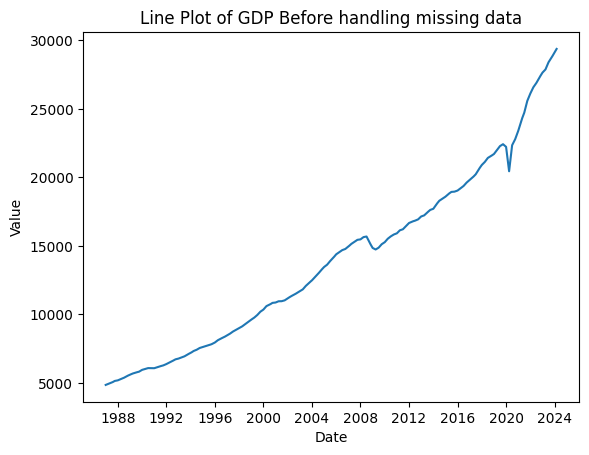

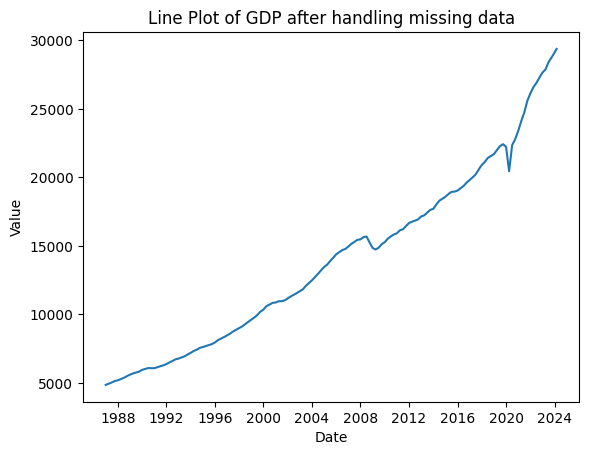

In [91]:
import matplotlib.pyplot as plt

plt.plot(gdp.date, gdp.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Line Plot of GDP Before handling missing data")
plt.show()

plt.plot(df.date, df.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Line Plot of GDP after handling missing data")
plt.show()



Literally can spot no difference ! GDP has been handled. Onto meho, mort15, mort30 now.

In [92]:
meho.date.min()

Timestamp('1987-01-01 00:00:00')

In [93]:
meho.date.max()

Timestamp('2022-01-01 00:00:00')

In [94]:
meho

,date,value
0,1987-01-01,60760.0
1,1988-01-01,61210.0
2,1989-01-01,62260.0
3,1990-01-01,61500.0
4,1991-01-01,59710.0
5,1992-01-01,59210.0
6,1993-01-01,58920.0
7,1994-01-01,59550.0
8,1995-01-01,61440.0
9,1996-01-01,62350.0


We have only one median income value per year.

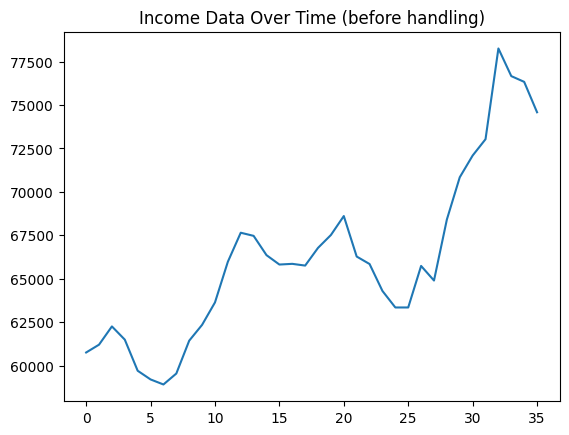

In [95]:
meho["value"].plot(title="Income Data Over Time (before handling)")
plt.show()

In [110]:
meho.columns

Index(['Median Household Income'], dtype='object')

In [113]:
meho["date"] = pd.to_datetime(meho["date"])
meho.reset_index(drop=True, inplace=True)
meho.set_index("date", inplace=True)
meho_resampled = meho.resample("M").mean()
meho_interpolated = meho_resampled.interpolate(method="linear")
print(meho_interpolated)

KeyError: 'date'

In [98]:
meho = meho_interpolated.copy()

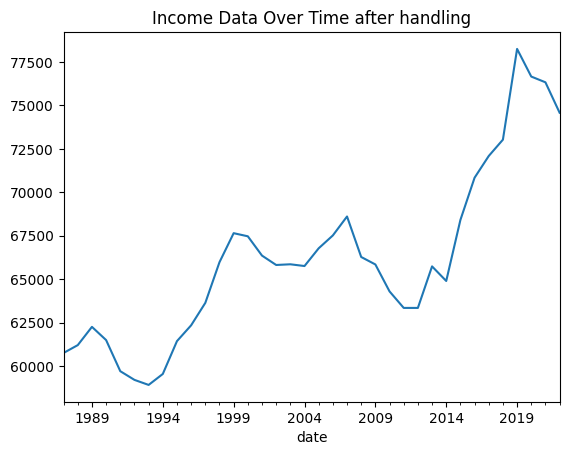

In [99]:
meho["value"].plot(title="Income Data Over Time after handling")
plt.show()

Median Income is also handled. Now need to handle Mortgage interest rates

Scaling down 1900+ data points to some 500 doesn"t sound like a good Idea, so let us not use mortgage interest rates and I have found a new key factor based on PERMIT : "Number of new housing units authorized by building permits."


In [100]:
permit

,date,value
0,1987-01-01,1690.0
1,1987-02-01,1689.0
2,1987-03-01,1704.0
3,1987-04-01,1601.0
4,1987-05-01,1500.0
...,...,...
442,2023-11-01,1508.0
443,2023-12-01,1530.0
444,2024-01-01,1508.0
445,2024-02-01,1563.0


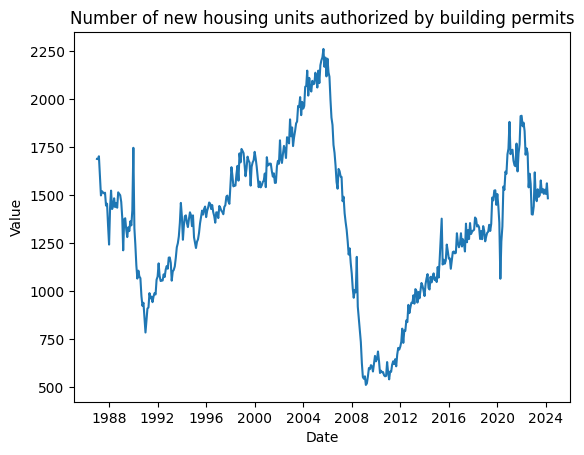

In [101]:
permit_dup = permit.copy()
# permit_dup.columns
permit_dup["date"] = pd.to_datetime(permit_dup["date"], format="%Y-%m-%d")
plt.plot(permit_dup.date, permit_dup.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Number of new housing units authorized by building permits")
plt.show()

## Building Final Dataset

we need to build a final dataset from all the features now.

In [109]:
from datetime import datetime

cpi.rename(columns={"value": "CPI"}, inplace=True)
csus.rename(columns={"value": "Home Price Index"}, inplace=True)
fedfunds.rename(columns={"value": "Federal Funds Rate"}, inplace=True)
gdp.rename(columns={"value": "GDP"}, inplace=True)
houst.rename(columns={"value": "Housing Starts"}, inplace=True)
mcoil.rename(columns={"value": "Crude Oil Prices"}, inplace=True)
meho_interpolated.rename(columns={"value": "Median Household Income"}, inplace=True)
pop.rename(columns={"value": "Population"}, inplace=True)
unrate.rename(columns={"value": "Unemployment Rate"}, inplace=True)
permit.rename(columns={"value": "Building Permits"}, inplace=True)

print(meho_interpolated)


data_frames = [cpi, csus, fedfunds, gdp, houst, mcoil, meho_interpolated, pop, unrate, permit]
for df in data_frames:
    df.index.name = 'date'

merged_df = pd.concat(data_frames, axis=1, join='outer')

merged_df.reset_index(inplace=True)

print(merged_df)

            Median Household Income
date                               
1987-01-31             60760.000000
1987-02-28             60797.500000
1987-03-31             60835.000000
1987-04-30             60872.500000
1987-05-31             60910.000000
...                             ...
2021-09-30             75163.333333
2021-10-31             75017.500000
2021-11-30             74871.666667
2021-12-31             74725.833333
2022-01-31             74580.000000

[421 rows x 1 columns]


C:\Users\vamsh\AppData\Local\Temp\ipykernel_12640\3710911073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csus.rename(columns={"value": "Home Price Index"}, inplace=True)


ValueError: cannot insert date, already exists

<Axes: >

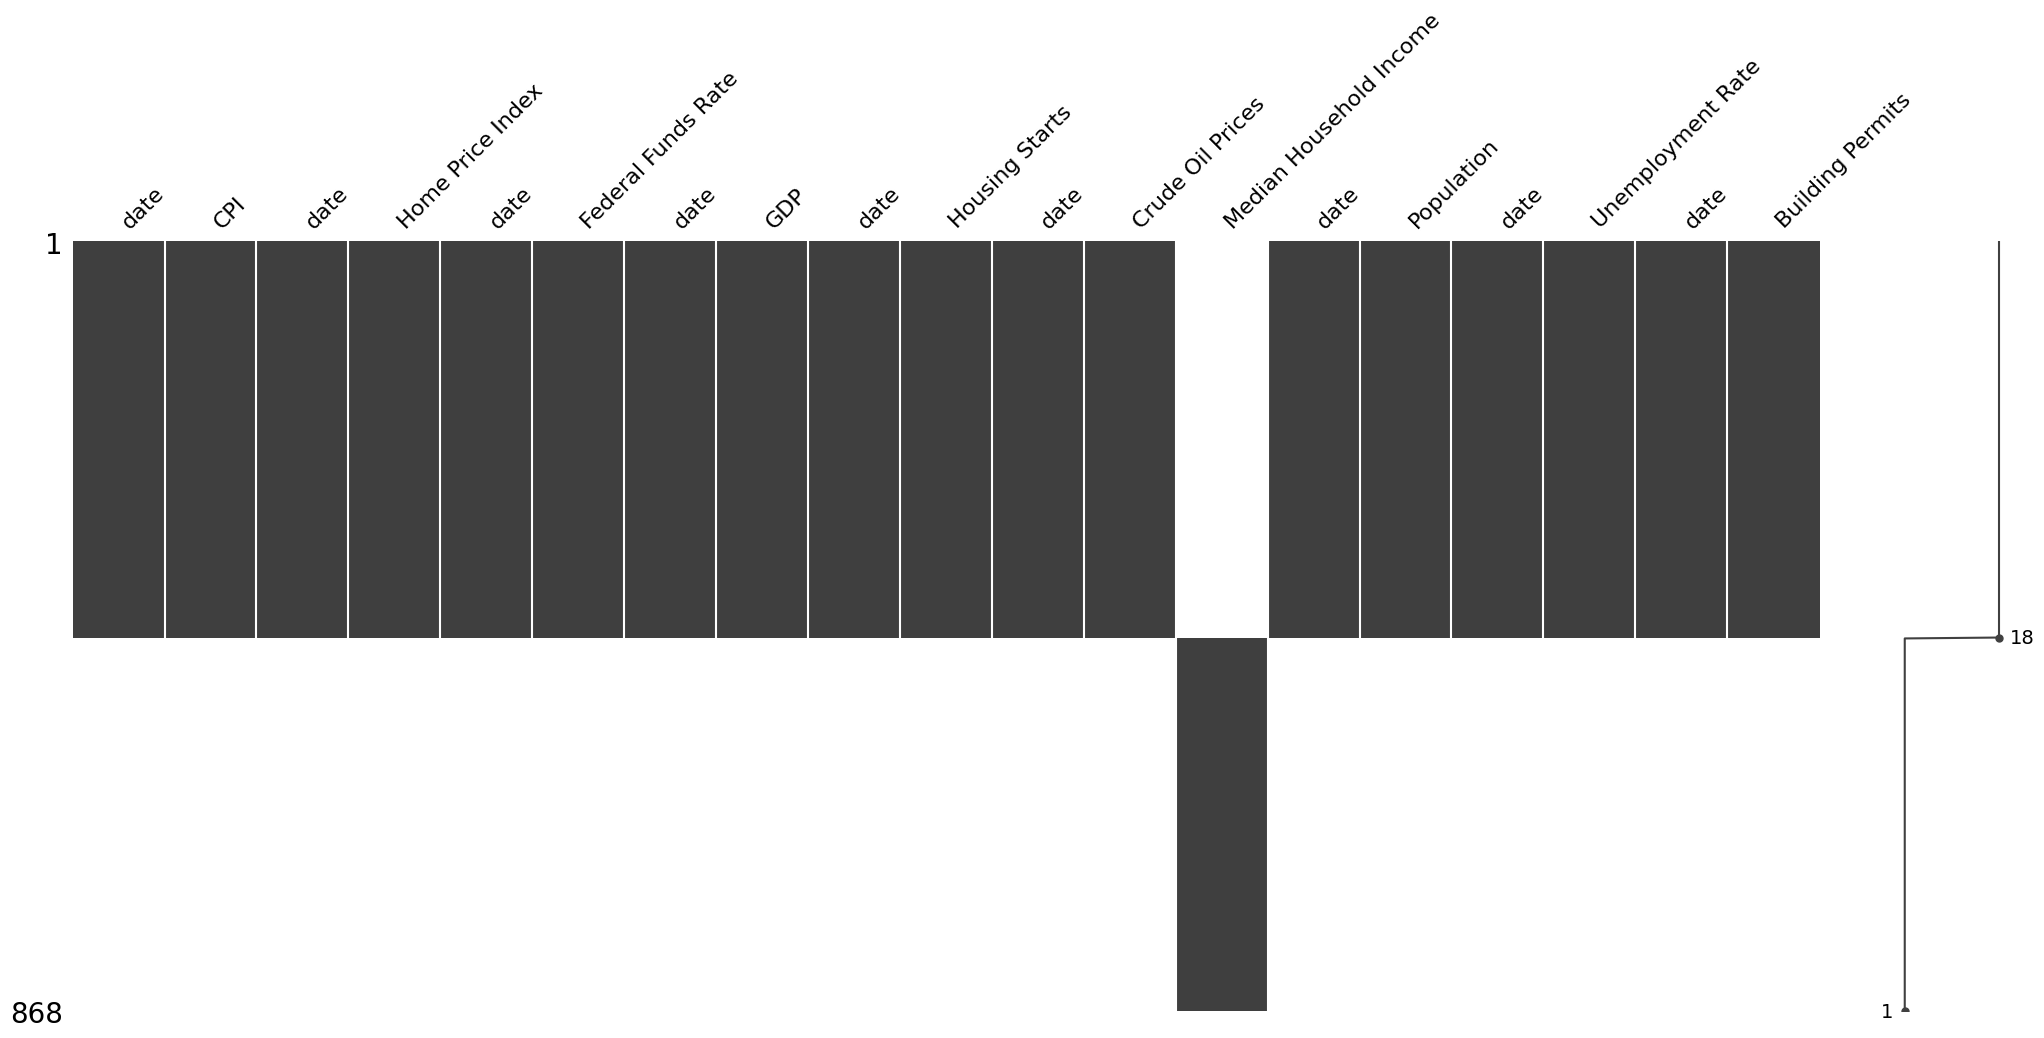

In [107]:
mno.matrix(merged_df)